# Initialisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv('/Users/william/Documents/ESME/Ingé2/Projet/btc.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

df2017 = df.loc['2017':'2022']

#df.iloc[:, 48:96]

'''
col = list(df)
del col[96:]
del col[:48]

for i in col:
    df2017[[i]].plot()  
    df2017[[i]].plot.box()
'''

'\ncol = list(df)\ndel col[96:]\ndel col[:48]\n\nfor i in col:\n    df2017[[i]].plot()  \n    df2017[[i]].plot.box()\n'

<AxesSubplot:xlabel='time'>

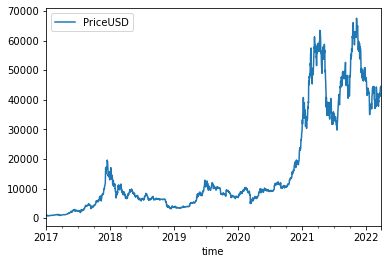

In [10]:
df2017[['PriceUSD']].plot()

# FlowInExNtv
### Flow, in, to exchanges, native units

Le nombre total d'unités natives envoyées aux exchanges ce jour-là, à l'exclusion de l'activité d’exchange à exchange
Cette métrique capture les interactions entre les utilisateurs d'un crypto-actif et les exchanges prenant en charge ce marché. Il exclut l'activité inter-exchange

Ex : Si une transaction envoie 90 unités de l'échange B à l'échange A, elle ne compte pas dans cette métrique.
Si une transaction dépense 10 unités de l'échange A et envoie 5 unités à l'échange B et 5 unités vers une destination inconnue, elle compte comme une sortie de 5 unités pour l'ensemble des échanges, une sortie de 10 unités pour l'échange A, une entrée de 5 unités pour l'échange B

,FlowInExNtv
count,1911.000000
mean,33945.293482
std,21347.841432
min,6754.762892
25%,20698.708717
50%,28696.173076
75%,40451.212175
max,206252.763800


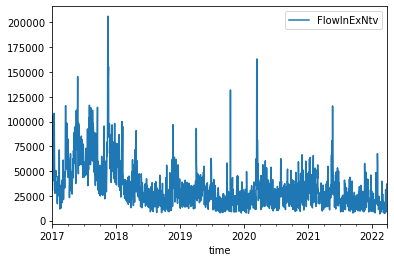

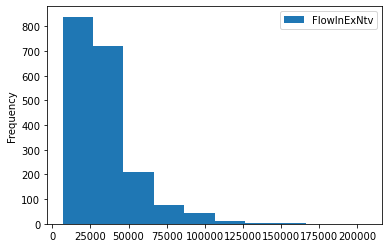

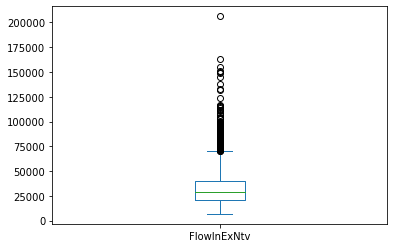

In [12]:
df2017[['FlowInExNtv']].plot()
df2017[['FlowInExNtv']].plot.hist()
df2017[['FlowInExNtv']].plot.box()
df2017[['FlowInExNtv']].describe()

Variable qui varie peu, qui semble pas impacté par les événements, beaucoup de valeurs aberrantes.

VARIABLE NON RETENUE

# FlowInExUSD
### Flow, in, to exchanges, USD
La valeur totale en USD envoyée aux exchanges ce jour-là, à l'exclusion de l'activité d'exchange à exchange


,FlowInExUSD
count,1.911000e+03
mean,4.625610e+08
std,5.029671e+08
min,1.178087e+07
25%,1.439785e+08
50%,2.514144e+08
75%,6.104549e+08
max,4.356434e+09


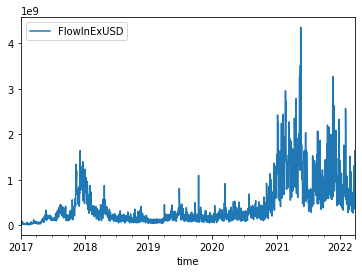

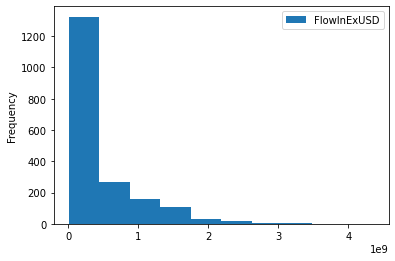

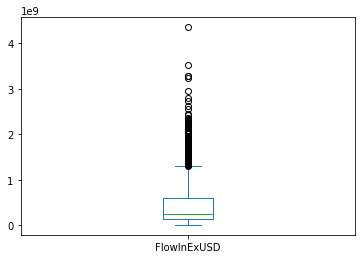

In [13]:
df2017[['FlowInExUSD']].plot()
df2017[['FlowInExUSD']].plot.hist()
df2017[['FlowInExUSD']].plot.box()
df2017[['FlowInExUSD']].describe()

Variable qui varie semblablement au cours du BTC.

VARIABLE RETENUE

# FlowOutExNtv
### Flow, out, from exchanges, native units

La somme en unités natives retirées des exchanges ce jour-là, à l'exclusion de l'activité d'exchanges à exchange.
Cette métrique capture les interactions entre les utilisateurs d'un crypto-actif et les exchanges prenant en charge ce marché. Il exclut l'activité intercirconscription.

Ex : Si une transaction envoie 90 unités de l'exchange B à l'exchange A, elle ne compte pas dans cette métrique.
Si une transaction dépense 10 unités de l'exchange A et envoie 5 unités à l'exchange B et 5 unités vers une destination inconnue, elle compte comme une sortie de 5 unités pour l'ensemble des échanges, une sortie de 10 unités pour l'exchange A, une entrée de 5 unités pour l'exchange B

,FlowOutExNtv
count,1911.000000
mean,34486.964336
std,20798.761883
min,5972.002466
25%,20552.467971
50%,29634.973101
75%,42517.461089
max,210609.435333


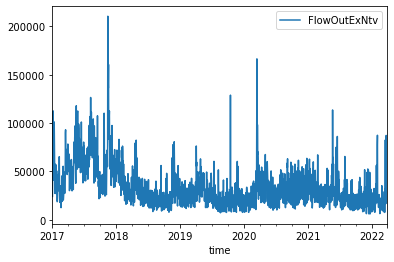

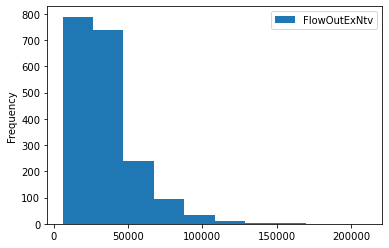

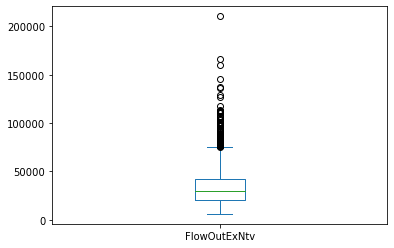

In [15]:
df2017[['FlowOutExNtv']].plot()
df2017[['FlowOutExNtv']].plot.hist()
df2017[['FlowOutExNtv']].plot.box()
df2017[['FlowOutExNtv']].describe()

Variable qui varie semblablement à FlowInExNtv

VARIABLE NON RETENUE

# FlowOutExUSD
### Flow, out, from exchanges, USD

La somme de la valeur en USD retirée des échanges ce jour-là, à l'exclusion de l'activité d'échange à échange. Calculé comme FlowrOutExNtv * Prix USD

,FlowOutExUSD
count,1.911000e+03
mean,4.828350e+08
std,5.410353e+08
min,1.319546e+07
25%,1.429774e+08
50%,2.560923e+08
75%,6.484825e+08
max,4.275743e+09


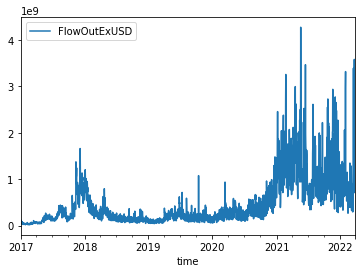

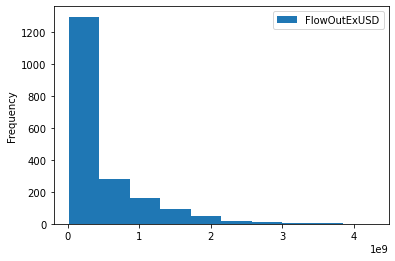

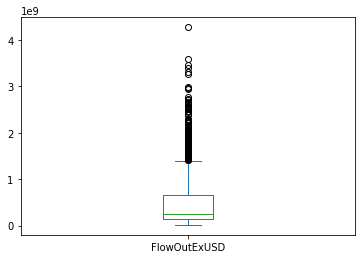

In [17]:
df2017[['FlowOutExUSD']].plot()
df2017[['FlowOutExUSD']].plot.hist()
df2017[['FlowOutExUSD']].plot.box()
df2017[['FlowOutExUSD']].describe()

Variable qui varie semblablement au cours du BTC.

VARIABLE RETENUE

# FlowTfrFromExCnt
### Flow, transfers, from exchanges, count

Le nombre total de transferts depuis n'importe quelle adresse appartenant à un exchange dans cet intervalle. Les transferts entre exchanges ne sont pas comptabilisés.

,FlowTfrFromExCnt
count,1911.000000
mean,27958.421245
std,13206.430065
min,5613.000000
25%,20542.000000
50%,26247.000000
75%,32706.500000
max,100256.000000


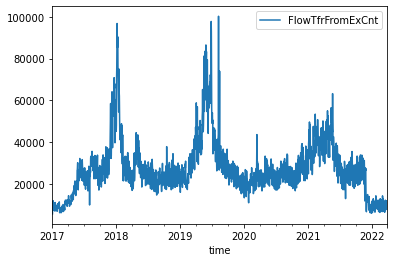

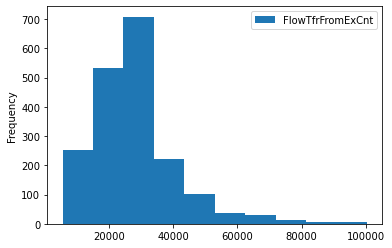

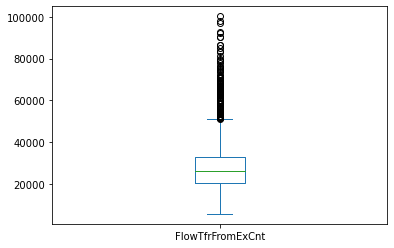

In [18]:
df2017[['FlowTfrFromExCnt']].plot()
df2017[['FlowTfrFromExCnt']].plot.hist()
df2017[['FlowTfrFromExCnt']].plot.box()
df2017[['FlowTfrFromExCnt']].describe()

Nous pouvons voir que à chaque fois que le cours du BTC augmente, le nombre de transferts augmentent aussi. Cette variable a un lien avec le cours du BTC

VARIABLE RETENUE

# HashRate
### Hash rate, mean

Le taux moyen auquel les mineurs résolvent les hachages ce jour-là. Le taux de hachage est la vitesse à laquelle les calculs sont effectués sur tous les mineurs du réseau. L'unité de mesure varie selon le protocole.

Le taux de hachage est dérivé de la difficulté (DiffMean), de la vitesse à laquelle le bloc est entré (BlkIntMean) et, selon les protocoles, d'autres éléments de données. Il donne une estimation de la puissance de hachage extraite d'une chaîne donnée.

,HashRate
count,1.911000e+03
mean,8.013966e+07
std,5.865846e+07
min,2.147763e+06
25%,2.830056e+07
50%,7.527707e+07
75%,1.272245e+08
max,2.481103e+08


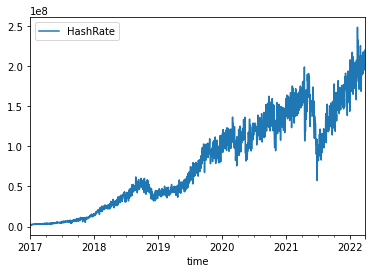

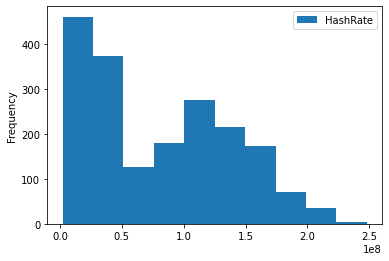

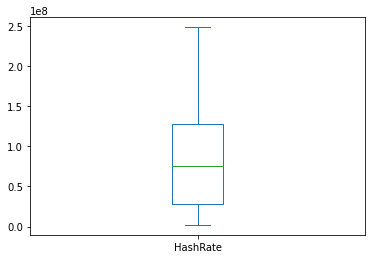

In [19]:
df2017[['HashRate']].plot()
df2017[['HashRate']].plot.hist()
df2017[['HashRate']].plot.box()
df2017[['HashRate']].describe()

Cette variable représente le parc des fermes de minage du BTC, la puissance de calcul. On peut voir une baisse très importante milieu 2021 qui est lié à la fermeture d'un très grand nombre de fermes en Chine. La Chine représente environ 70 % de l'ensemble des fermes du BTC. La fermeture de ces fermes a aussi entrainé un forte chute du cours du BTC.

VARIABLE RETENUE

# HashRate30d
### Hash rate, mean, 30d

Le taux moyen auquel les mineurs résolvent les hachages au cours des 30 derniers jours. Le taux de hachage est la vitesse à laquelle les calculs sont effectués sur tous les mineurs du réseau. L'unité de mesure varie selon le protocole

,HashRate30d
count,1.911000e+03
mean,7.861125e+07
std,5.733620e+07
min,2.278160e+06
25%,2.769669e+07
50%,7.068898e+07
75%,1.257369e+08
max,2.002421e+08


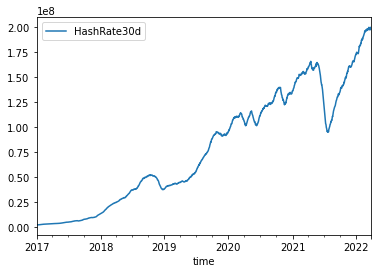

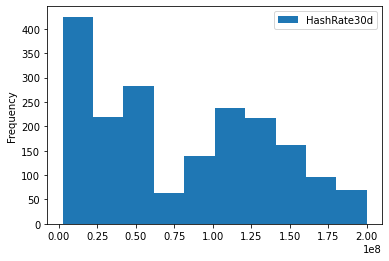

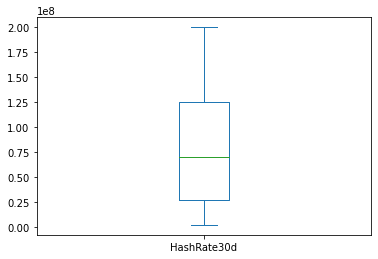

In [20]:
df2017[['HashRate30d']].plot()
df2017[['HashRate30d']].plot.hist()
df2017[['HashRate30d']].plot.box()
df2017[['HashRate30d']].describe()

VARIABLE RETENUE ???

# IssContNtv
### Issuance, continuous, native units

La somme des nouvelles unités natives émises cet intervalle. Seules les unités natives qui sont émises par un calendrier d'émissions continues mandaté par le protocole sont incluses (c'est-à-dire que les unités libérées manuellement de l'entiercement ou autrement décaissées ne sont pas incluses)

,IssContNtv
count,1911.000000
mean,1527.708006
std,496.543955
min,362.500000
25%,962.500000
50%,1725.000000
75%,1925.000000
max,2462.500000


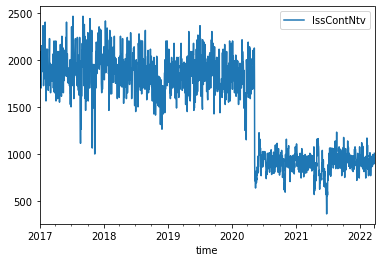

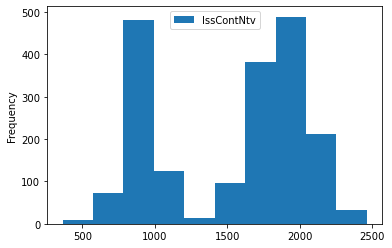

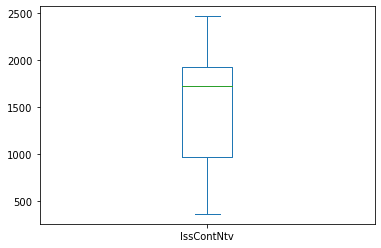

In [21]:
df2017[['IssContNtv']].plot()
df2017[['IssContNtv']].plot.hist()
df2017[['IssContNtv']].plot.box()
df2017[['IssContNtv']].describe()

<AxesSubplot:xlabel='time'>

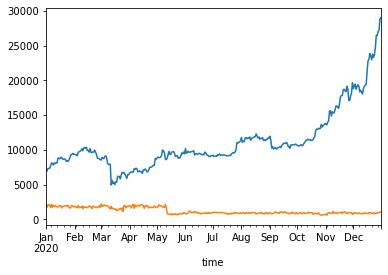

In [25]:
df2017['PriceUSD'].loc['2020'].plot()
df2017['IssContNtv'].loc['2020'].plot()

Nombre de nouveaux BTC créés chaque jour, ne semble pas avoir d'incidence sur le cours du BTC

VARIABLE NON RETENUE

# IssContPctAnn
### Issuance, continuous, percent, annualized

Le pourcentage de nouvelles unités natives (continues) émises ce jour-là, extrapolé à un an (c'est-à-dire multiplié par 365) et divisé par l'offre actuelle ce jour-là. Parfois appelé taux d'inflation annuel.

Cette mesure peut être considérée comme le taux d'inflation annualisé de l'actif. Notez qu'il n'inclut que l'inflation prévisible, un autre programme d'émission pourrait se produire qui conduirait à cette métrique sous-estimant l'inflation.

Calculé comme 100 * IssContNtv * 365 / SplyCur

Une valeur de 1,0 signifie que l'offre de l'actif augmentera de 1 % par an.

Cette mesure extrapole le taux d'émission à partir de l'émission du jour en cours. Il ne prend pas en compte les changements qui se produiront après le jour du calcul de cette métrique, comme les changements imprévisibles de l'ETH dans la politique monétaire (aucune connaissance prospective).

,IssContPctAnn
count,1911.000000
mean,3.187219
std,1.134412
min,0.705911
25%,1.873414
50%,3.605505
75%,4.108323
max,5.467234


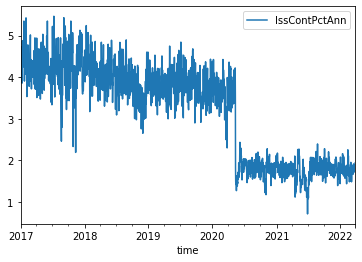

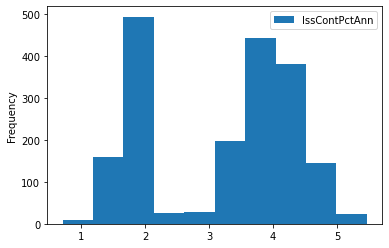

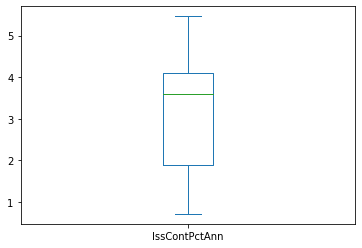

In [26]:
df2017[['IssContPctAnn']].plot()
df2017[['IssContPctAnn']].plot.hist()
df2017[['IssContPctAnn']].plot.box()
df2017[['IssContPctAnn']].describe()

Variable comme IssContPctAnn

VARIABLE NON RETENUE

# IssContPctDay
### Issuance, continuous, percent, daily

Le pourcentage de nouvelles unités natives (continues) émises ce jour-là divisé par l'offre actuelle ce jour-là. Aussi appelé taux d'inflation quotidien.

Calculé comme 100 * IssContNtv / SplyCur

Également équivalent à IssContPctAnn / 365

,IssContPctDay
count,1911.000000
mean,0.008732
std,0.003108
min,0.001934
25%,0.005133
50%,0.009878
75%,0.011256
max,0.014979


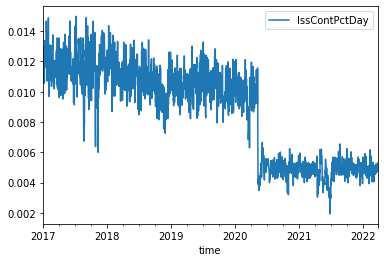

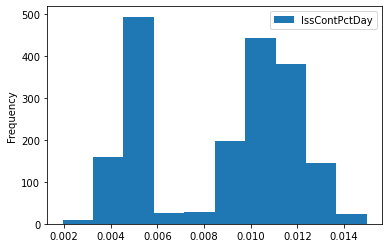

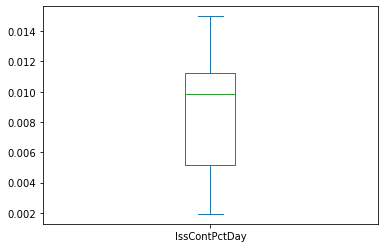

In [27]:
df2017[['IssContPctDay']].plot()
df2017[['IssContPctDay']].plot.hist()
df2017[['IssContPctDay']].plot.box()
df2017[['IssContPctDay']].describe()

Variable équivalente à IssContPctAnn / 365

VARIABLE NON RETENUE

# IssContUSD
### Issuance, continuous, USD

La valeur totale en USD des nouvelles unités natives émises à cet intervalle. Seules les unités natives qui sont émises par un calendrier d'émissions continues mandaté par un protocole sont incluses (c'est-à-dire que les unités libérées manuellement de l'entiercement ou décaissées d'une autre manière ne sont pas incluses)

,IssContUSD
count,1.911000e+03
mean,1.920138e+07
std,1.487892e+07
min,1.507652e+06
25%,8.817623e+06
50%,1.432118e+07
75%,2.575180e+07
max,7.169853e+07


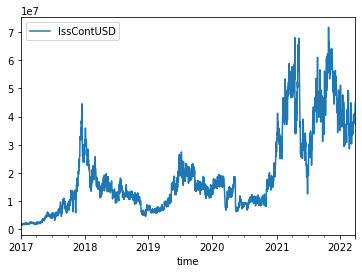

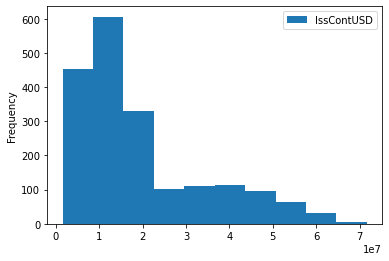

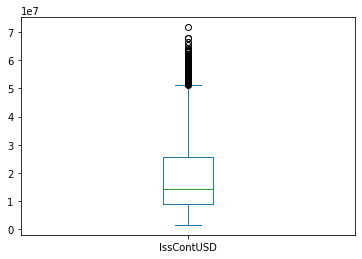

In [30]:
df2017[['IssContUSD']].plot()
df2017[['IssContUSD']].plot.hist()
df2017[['IssContUSD']].plot.box()
df2017[['IssContUSD']].describe()

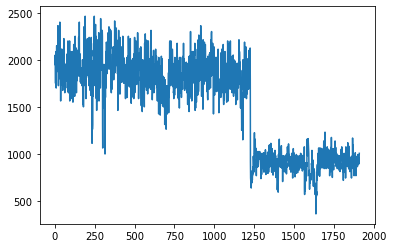

In [34]:
aIssContUSD = df2017['IssContUSD'].tolist()
bIssContUSD = df2017['PriceUSD'].tolist()
zIssContUSD = [m/n for m, n in zip(aIssContUSD, bIssContUSD)]
plt.plot(zIssContUSD)

Variable qui décrit la même qui précédement mais en USD

VARIABLE NON RETENNUE

# IssTotNtv
### Issuance, total, native units

La somme de toutes les nouvelles unités natives émises ce jour-là

Dans cette métrique, par rapport à la continue, toutes les sources d'émission sont prises en compte.
Cette métrique est l'émission brute : si dans la même journée, 100 unités sont émises et 10 brûlées, la valeur de cette métrique sera de 100, et non de 90 (ce qui serait l'émission nette).

,IssTotNtv
count,1911.000000
mean,1527.708006
std,496.543955
min,362.500000
25%,962.500000
50%,1725.000000
75%,1925.000000
max,2462.500000


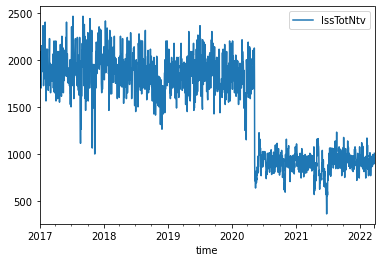

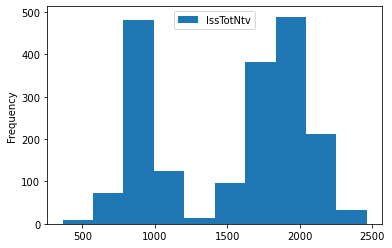

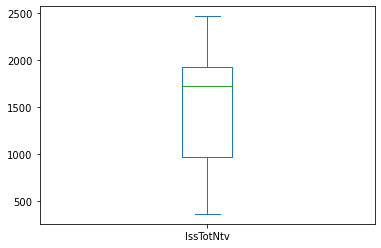

In [36]:
df2017[['IssTotNtv']].plot()
df2017[['IssTotNtv']].plot.hist()
df2017[['IssTotNtv']].plot.box()
df2017[['IssTotNtv']].describe()

VARIABLE NON RETENUE

# IssTotUSD
### Issuance, total, USD

La valeur totale en USD de toutes les nouvelles unités natives émises ce jour-là

Calculé comme IssTotNtv * PriceUSD

Cette métrique peut être comprise comme les revenus du mineur (ou du validateur) en termes fiduciaires, hors frais.

,IssTotUSD
count,1.911000e+03
mean,1.920138e+07
std,1.487892e+07
min,1.507652e+06
25%,8.817623e+06
50%,1.432118e+07
75%,2.575180e+07
max,7.169853e+07


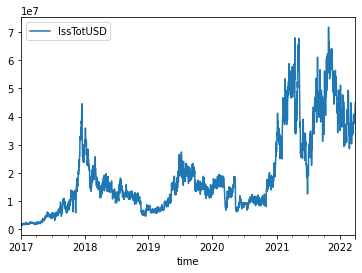

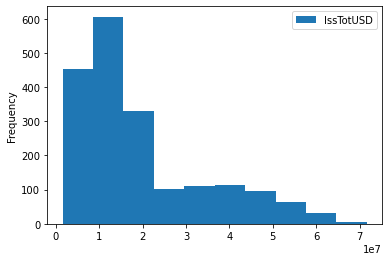

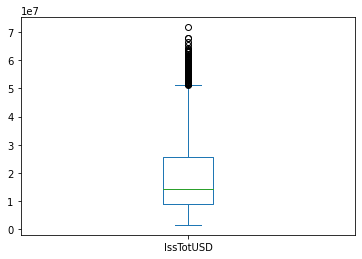

In [37]:
df2017[['IssTotUSD']].plot()
df2017[['IssTotUSD']].plot.hist()
df2017[['IssTotUSD']].plot.box()
df2017[['IssTotUSD']].describe()

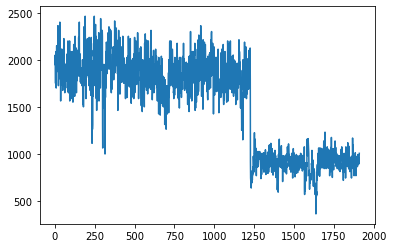

In [38]:
aIssTotUSD = df2017['IssTotUSD'].tolist()
bIssTotUSD = df2017['PriceUSD'].tolist()
zIssTotUSD = [m/n for m, n in zip(aIssTotUSD, bIssTotUSD)]
plt.plot(zIssTotUSD)

VARIABLE NON RETENUE

# NDF
### Network distribution factor

Le rapport de l'offre détenue par les adresses avec au moins 1/10000 de l'offre actuelle d'unités natives à l'offre actuelle 

,NDF
count,1911.000000
mean,0.346234
std,0.007103
min,0.323129
25%,0.341524
50%,0.346975
75%,0.351957
max,0.362918


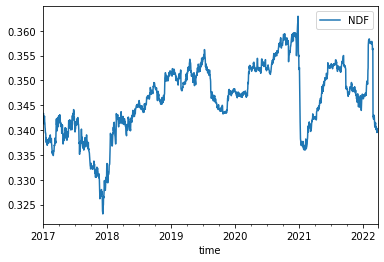

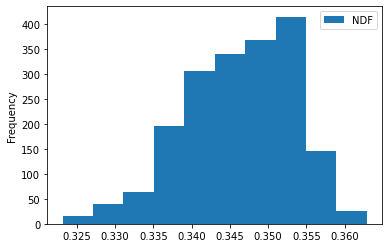

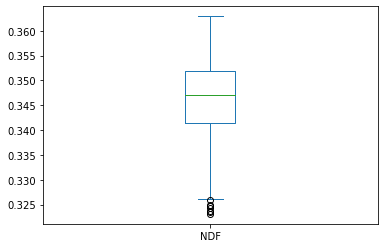

In [39]:
df2017[['NDF']].plot()
df2017[['NDF']].plot.hist()
df2017[['NDF']].plot.box()
df2017[['NDF']].describe()

On remarque que la courbe semblable à l'inverse du cours du BTC. Par exemple, fin 2017 forte monté du BTC et chute NDF, pareil mid 2021

VARIABLE RETENUE

# NVTAdj
### NVT, adjusted, Network Value to Transactions

Le ratio NVT est défini comme le ratio de la capitalisation boursière divisé par le volume de transactions dans la fenêtre spécifiée.

Le rapport de la valeur du réseau (ou capitalisation boursière, offre actuelle) divisée par la valeur de transfert ajustée. Aussi appelé NVT.

Cette métrique utilise la valeur réseau des unités natives et le volume de transactions ajusté. Il est donc disponible à la genèse de l'actif, contrairement à s'il utilisait des valeurs en USD.

Il peut être considéré comme un proxy approximatif du rapport P/B (price to book) pour les crypto actifs.

NVT a été beaucoup discuté; en bref, il compare la capitalisation boursière à l'utilisation transactionnelle en chaîne. Les chaînes de blocs à forte utilisation par rapport à la capitalisation boursière ont un NVT plus élevé. En ce sens, il peut être compris comme l'opposé de la vitesse. En raison de différences structurelles dans les modes d'utilisation de la blockchain, les NVT de tous les actifs ne sont pas directement comparables. Notre formulation utilise un volume de transactions ajusté, car nous comprenons qu'il s'agit d'une mesure plus pure de l'utilisation réelle de la chaîne.

,NVTAdj
count,1911.000000
mean,71.077777
std,32.536814
min,15.221945
25%,48.475181
50%,65.551302
75%,84.683664
max,252.895602


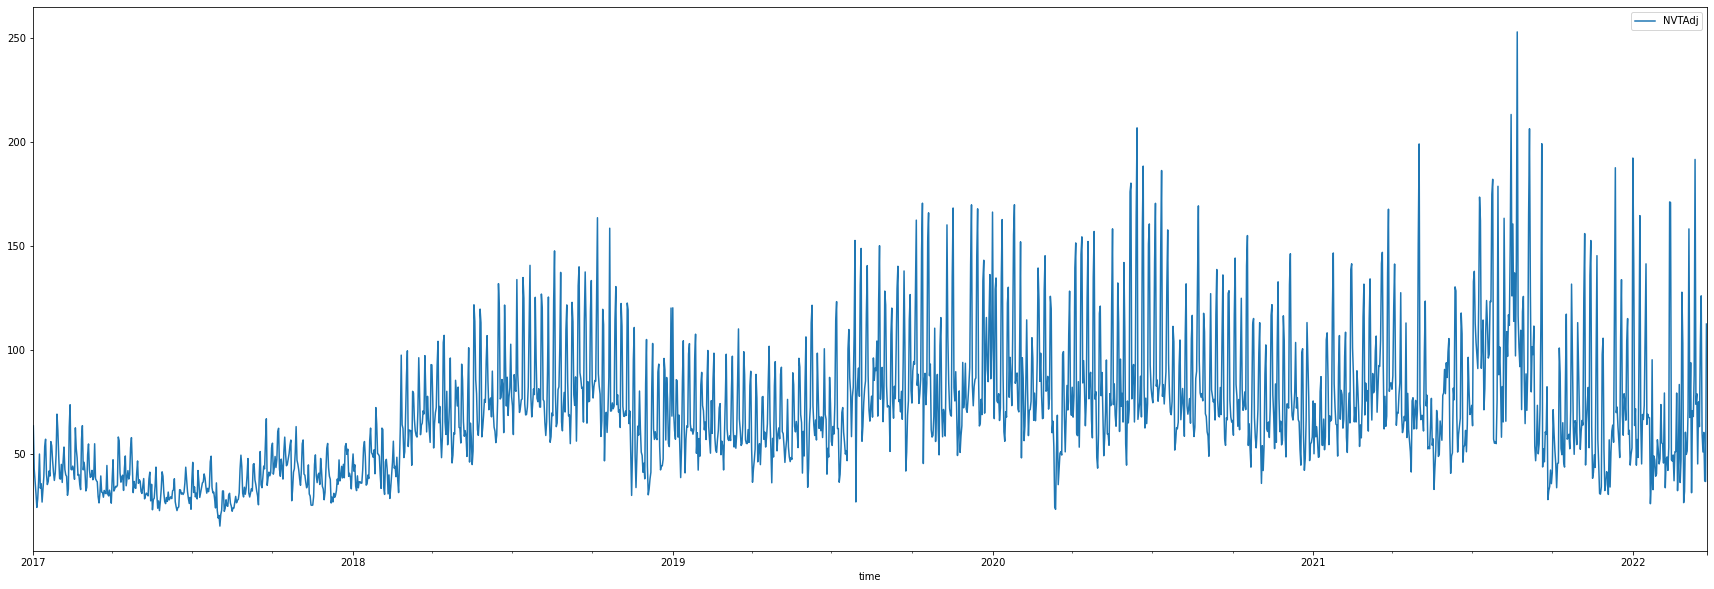

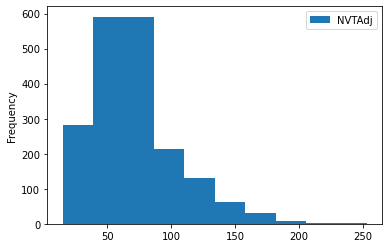

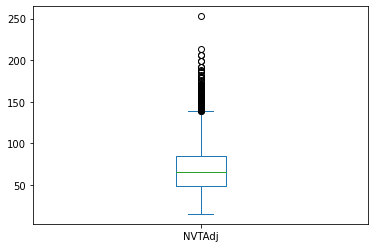

In [42]:
df2017[['NVTAdj']].plot(figsize = (30,10))
df2017[['NVTAdj']].plot.hist()
df2017[['NVTAdj']].plot.box()
df2017[['NVTAdj']].describe()

Pas possible d'interpréter ces valeurs ?

# NVTAdj90
### NVT, adjusted, 90d MA

Le rapport de la valeur du réseau (ou capitalisation boursière, offre actuelle) à la moyenne mobile sur 90 jours de la valeur de transfert ajustée. Aussi appelé NVT.

Il est calculé comme une moyenne mobile sur 90 jours du volume de transfert ajusté en USD par rapport à la capitalisation boursière actuelle.

,NVTAdj90
count,1911.000000
mean,69.498860
std,22.003212
min,22.117424
25%,50.953761
50%,68.267603
75%,85.740658
max,141.514790


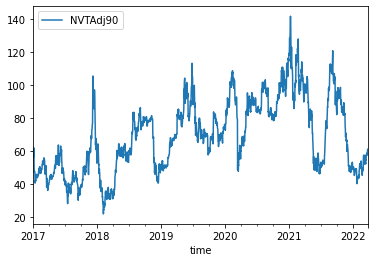

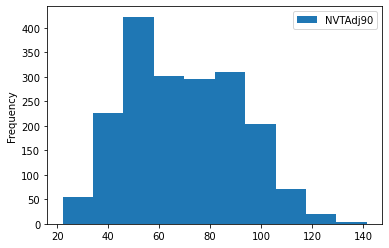

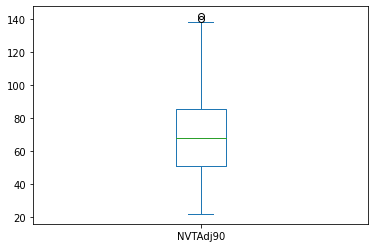

In [41]:
df2017[['NVTAdj90']].plot()
df2017[['NVTAdj90']].plot.hist()
df2017[['NVTAdj90']].plot.box()
df2017[['NVTAdj90']].describe()

On remarque que les montées et descentes de cette courbe sont liées au cours du BTC. Par exemple, mid 2021

VARIABLE RETENUE

# NVTAdjFF
### NVT, adjusted, free float

Le ratio de la valeur du réseau du flottant (ou capitalisation boursière, flottant) divisée par la valeur de transfert ajustée. Aussi appelé FFNVT.

Cette mesure fournit un ajustement important du rapport valeur réseau (market capt)/transaction (NVT) en utilisant l'offre de flottement libre (SplyFF)

,NVTAdjFF
count,1911.000000
mean,56.365818
std,25.162423
min,12.607006
25%,38.560149
50%,51.752805
75%,67.218227
max,195.153499


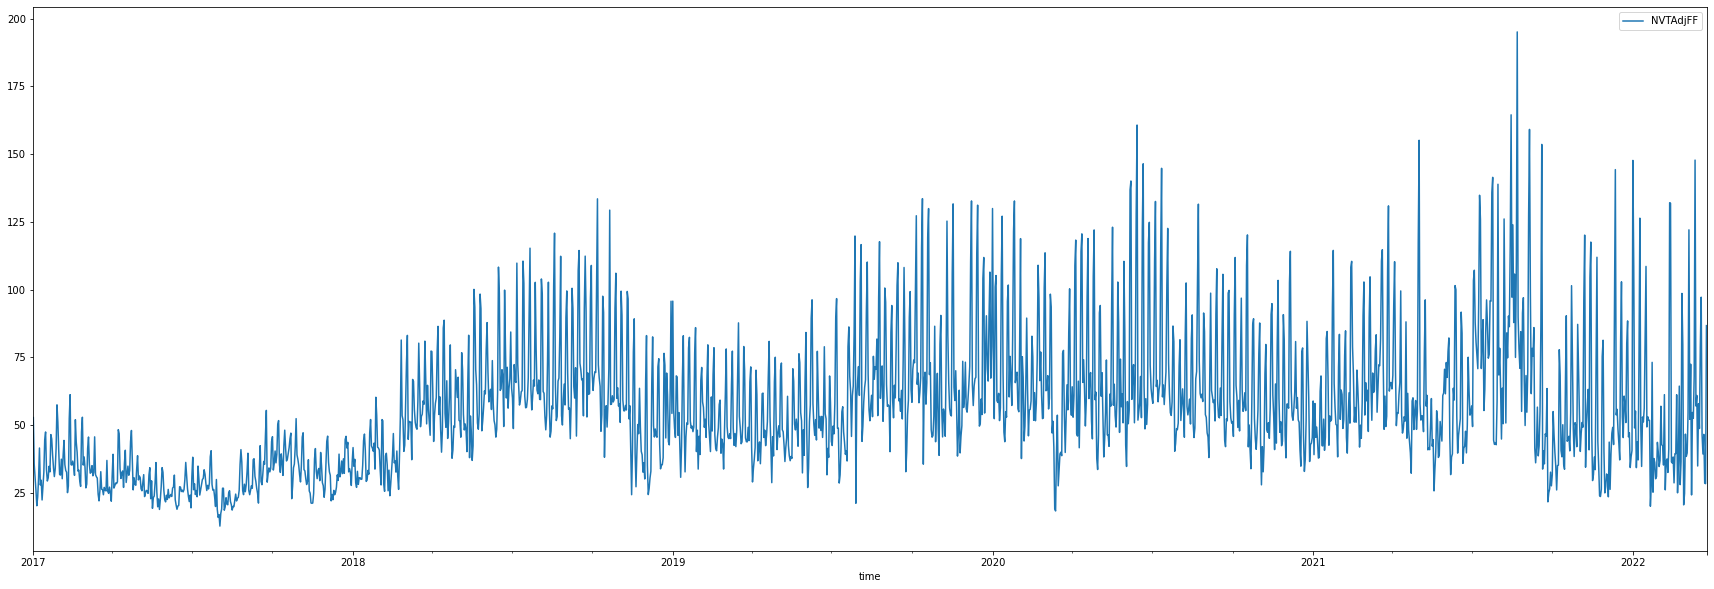

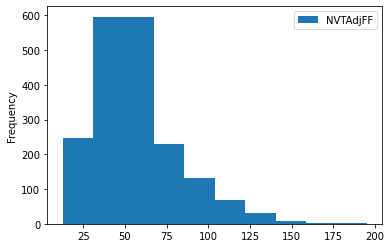

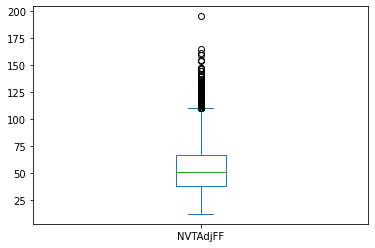

In [44]:
df2017[['NVTAdjFF']].plot(figsize=(30,10))
df2017[['NVTAdjFF']].plot.hist()
df2017[['NVTAdjFF']].plot.box()
df2017[['NVTAdjFF']].describe()

Variable sembable à NVTAdj, pas d'interprétation possible ?

# NVTAdjFF90
### NVT, adjusted, free float, 90d MA

Le rapport de la valeur du réseau flottant (ou capitalisation boursière, flottant) à la moyenne mobile sur 90 jours de la valeur de transfert ajustée. Aussi appelé FFNVT.

Cette mesure fournit un ajustement important du rapport valeur réseau/transaction (NVT) en utilisant l'offre de flottement libre (SplyFF)

,NVTAdjFF90
count,1911.000000
mean,55.144256
std,16.672809
min,18.473959
25%,40.606777
50%,54.001760
75%,67.164610
max,110.519130


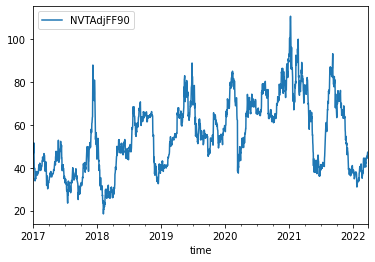

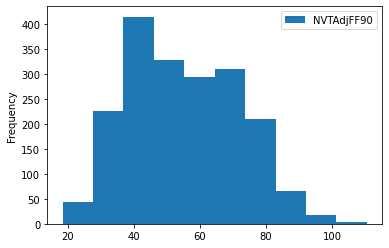

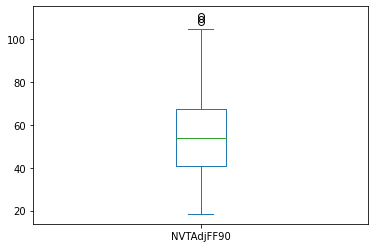

In [45]:
df2017[['NVTAdjFF90']].plot()
df2017[['NVTAdjFF90']].plot.hist()
df2017[['NVTAdjFF90']].plot.box()
df2017[['NVTAdjFF90']].describe()

Variable semblable à NVTAdj90

VARIABLE RETENUE

# PriceBTC

Le cours de clôture fixe de l'actif à 00h00 UTC le jour suivant (c'est-à-dire à minuit UTC du jour en cours) libellé en BTC.

Ce prix est calculé sur plusieurs marchés conformément à la méthodologie des taux de référence de Coin Metric.

,PriceBTC
count,1911.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


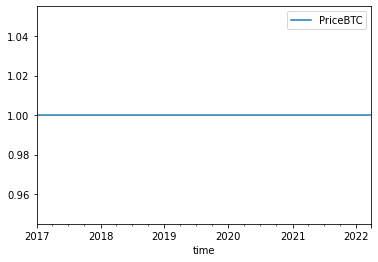

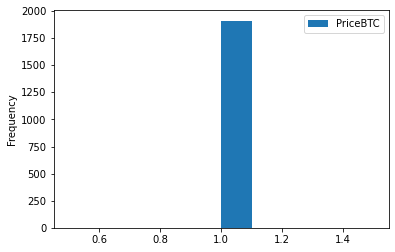

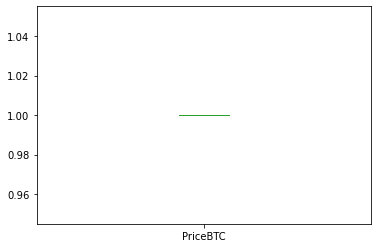

In [47]:
df2017[['PriceBTC']].plot()
df2017[['PriceBTC']].plot.hist()
df2017[['PriceBTC']].plot.box()
df2017[['PriceBTC']].describe()

Prix du BTC en BTC, donc 1 BTC = 1 BTC

VARIABLE NON RETENUE

# PriceUSD

Le cours de clôture fixe de l'actif à 00h00 UTC le jour suivant (c'est-à-dire à minuit UTC du jour en cours) libellé en USD. Ce prix est généré par le service de fixation/taux de référence de Coin Metrics.

Ce prix est calculé sur plusieurs marchés conformément à la méthodologie des taux de référence de Coin Metric.

,PriceUSD
count,1911.000000
mean,16618.633423
std,17436.412473
min,788.314656
25%,5827.421360
50%,8863.540829
75%,19048.329078
max,67541.755508


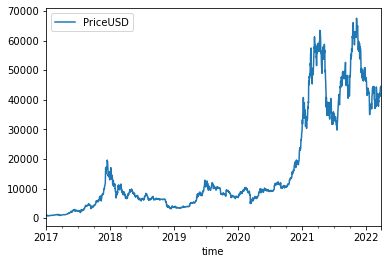

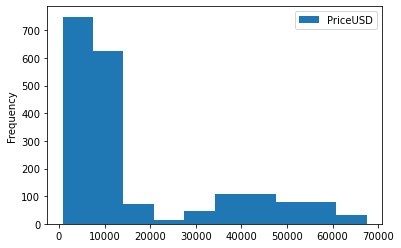

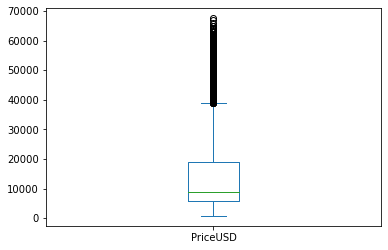

In [48]:
df2017[['PriceUSD']].plot()
df2017[['PriceUSD']].plot.hist()
df2017[['PriceUSD']].plot.box()
df2017[['PriceUSD']].describe()

Prix du BTC en USD

VARIABLE RETENUE

## Moyenne mobile BTC

In [51]:
MMSBTC = df2017['PriceUSD'].sum()/df2017.index.size
print(MMSBTC)

16609.941669598174


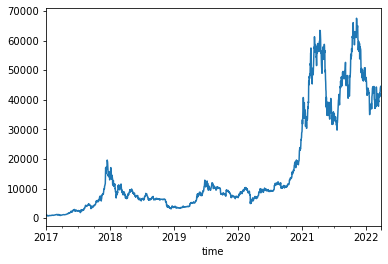

In [53]:
df2017['PriceUSD'].plot()
plt.plot(MMSBTC)

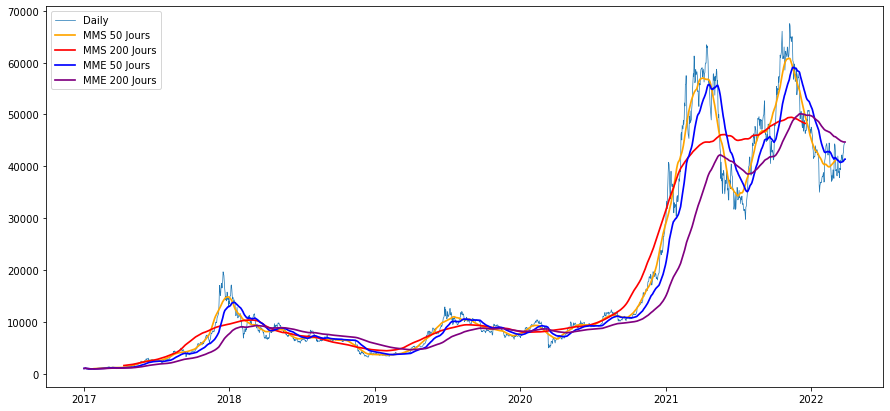

In [66]:
#btc_daily_rolling = df.rolling(182, center = True).mean()

BTCMms12Jours = df2017.rolling(12, center = True).mean()
BTCMms26Jours = df2017.rolling(26, center = True).mean()
BTCMms50Jours = df2017.rolling(50, center = True).mean()
BTCMms200Jours = df2017.rolling(200, center = True).mean()

BTCMme50Jours = df2017.ewm(span=50).mean()
BTCMme200Jours = df2017.ewm(span=200).mean()

fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(df2017["PriceUSD"], linestyle='-', linewidth=0.7, label='Daily')
#ax.plot(BTCMms12Jours["PriceUSD"], linewidth=0.7, label='MMS 12 Jours')
#ax.plot(BTCMms26Jours["PriceUSD"], linewidth=0.7, label='MMS 26 Jours')
ax.plot(BTCMms50Jours["PriceUSD"], color = 'orange', linewidth=1.7, label='MMS 50 Jours')
ax.plot(BTCMms200Jours["PriceUSD"], color = 'red', linewidth=1.7, label='MMS 200 Jours')
ax.plot(BTCMme50Jours["PriceUSD"], color = 'blue', linewidth=1.7, label='MME 50 Jours')
ax.plot(BTCMme200Jours["PriceUSD"], color = 'purple', linewidth=1.7, label='MME 200 Jours')

ax.legend();

In [2]:
df2017.index[-1]

Timestamp('2022-03-27 00:00:00')

On observe que la MMS sur période 50 jours suit de très près le cours du BTC. Elle n'est pas intéressante à analyser.

On obsreve quasiment la meme chose sur période de 200 jours

On observe que la MME sur période de 50 jours suit aussi de très près le cours du BTC MAIS elle est décalé à droite par rapport à la courbe du cours du BTC. De fait, lorsque nous pouvons voir que en bullrun, le cours du BTC>MME et en bearrun le cours du BTC>MME

On observe quasiment la emem chose sur période de 200 jours.

# ROI1yr
### ROI1yr

Le retour sur investissement de l'actif en supposant un achat 12 mois avant

,ROI1yr
count,1911.000000
mean,249.934885
std,347.469527
min,-83.730494
25%,25.357301
50%,144.809116
75%,333.121020
max,2410.835491


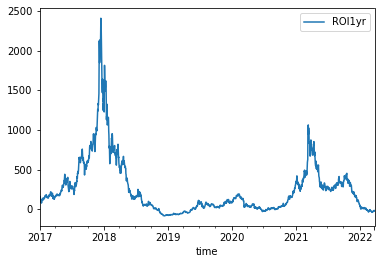

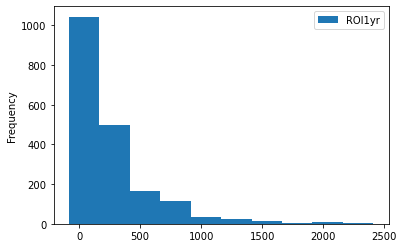

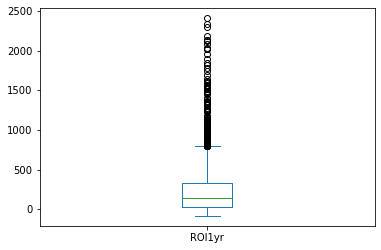

In [2]:
df2017[['ROI1yr']].plot()
df2017[['ROI1yr']].plot.hist()
df2017[['ROI1yr']].plot.box()
df2017[['ROI1yr']].describe()

Variable qui monter que le ROI 1yr est très souvent > 0. Variable qui décrit aussi la performance du BTC

VARIABLE RETENUE

# ROI30d
### ROI, percent, 30d

Le retour sur investissement de l'actif en supposant un achat 30 jours avant

,ROI30d
count,1911.000000
mean,9.791685
std,28.815386
min,-59.952601
25%,-9.259875
50%,4.307360
75%,26.755663
max,199.084545


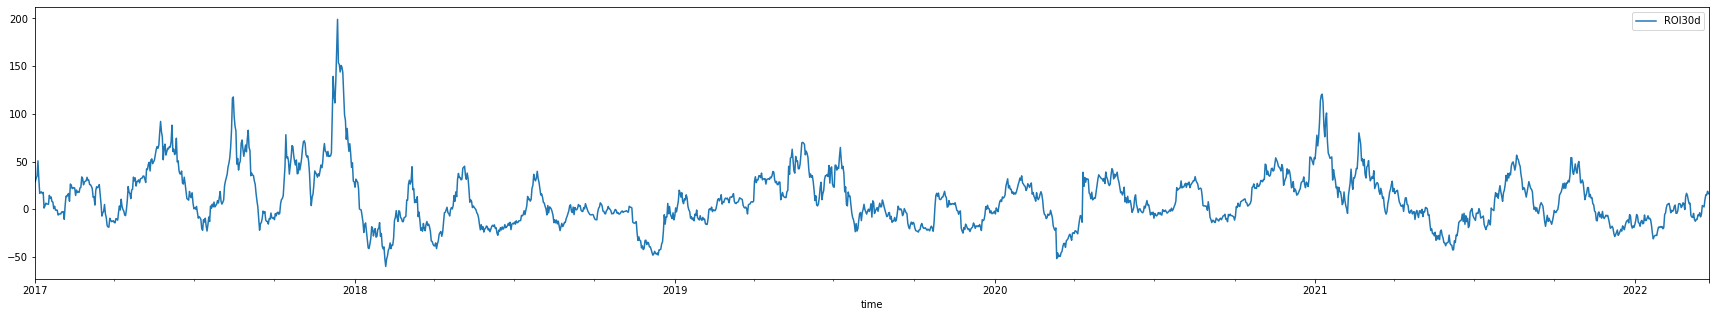

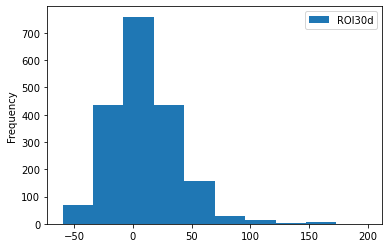

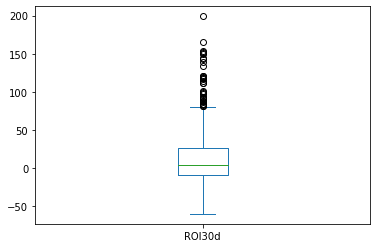

In [18]:
df2017[['ROI30d']].plot(figsize = (30,5))
df2017[['ROI30d']].plot.hist()
df2017[['ROI30d']].plot.box()
df2017[['ROI30d']].describe()

Courbe qui semble cyclique

VARIABLE RETENUE ??

# ReferenceRate
### Reference Rate, USD

Les taux de référence sont conçus pour représenter le prix d'un crypto-actif dans une transaction sans lien de dépendance entre un acheteur et un vendeur consentants. Il est conçu pour refléter le prix où la majorité des transactions ont eu lieu pour un cryptoactif donné en utilisant plusieurs marchés comme sources de données d'entrée.

Horaire (1h, 1j). Un cadre systématique évalue et sélectionne un ensemble unique de marchés constitutifs pour chaque crypto-actif et la méthodologie utilise des techniques de médiane pondérée en fonction du volume et de prix moyen pondéré en fonction du temps. Les tarifs de référence utilisent une fenêtre de 61 minutes pour calculer les prix une fois par heure, toutes les heures, y compris les week-ends et les jours fériés. Les taux de référence peuvent être utilisés pour la comptabilité de portefeuille, comme prix de règlement pour les contrats dérivés financiers et comme prix de clôture pour les produits d'investissement.

Temps réel (1s, 1m). Semblables aux taux de référence horaires, les taux de référence en temps réel sont conçus pour représenter le prix d'un crypto-actif dans une transaction sans lien de dépendance entre un acheteur et un vendeur consentants. Plutôt que d'être calculés une fois par heure, les taux de référence en temps réel ont une méthodologie distincte qui utilise des techniques de pondération médiane pondérée en fonction du volume et de variance de prix inverse pour calculer les prix une fois par seconde, chaque seconde, y compris les week-ends et les jours fériés.

,ReferenceRate
count,1912.000000
mean,16610.448453
std,17435.523451
min,788.314656
25%,5815.743249
50%,8859.538044
75%,19015.177051
max,67541.755508


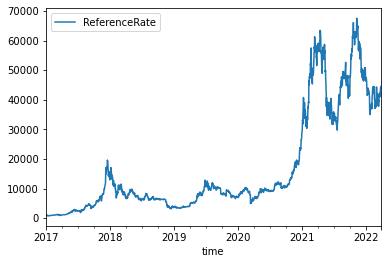

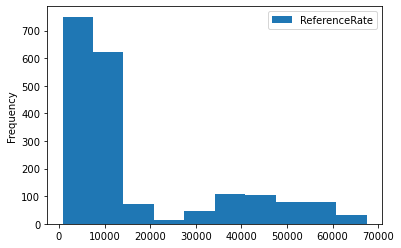

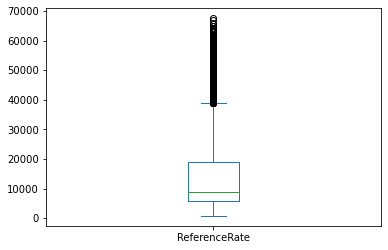

In [21]:
df2017[['ReferenceRate']].plot()
df2017[['ReferenceRate']].plot.hist()
df2017[['ReferenceRate']].plot.box()
df2017[['ReferenceRate']].describe()

Variable qui représente le prix du BTC en USD

VARIABLE RETENUE

# ReferenceRateETH
### Reference Rate, ETH

,ReferenceRateETH
count,1912.000000
mean,29.121822
std,17.002475
min,6.848603
25%,14.578947
50%,28.137888
75%,37.383322
max,121.946128


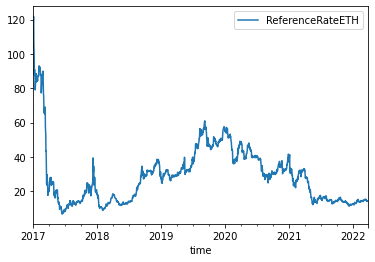

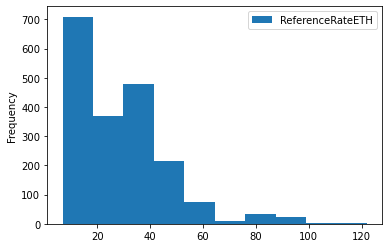

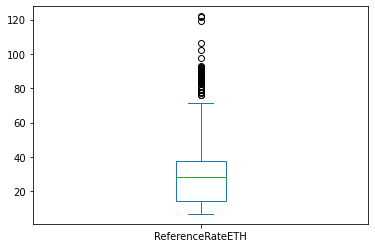

In [23]:
df2017[['ReferenceRateETH']].plot()
df2017[['ReferenceRateETH']].plot.hist()
df2017[['ReferenceRateETH']].plot.box()
df2017[['ReferenceRateETH']].describe()

Prix du BTC en ETH

VARIABLE NON RETENUE

# ReferenceRateEUR
### Reference Rate, EUR

Le prix d'un actif coté en euros en utilisant un cadre pour sélectionner des marchés constitutifs de haute qualité et une méthodologie qui résiste à la manipulation.

,ReferenceRateEUR
count,1912.000000
mean,14277.496243
std,14888.043692
min,753.372660
25%,5066.959532
50%,7838.677115
75%,15789.312975
max,58279.204935


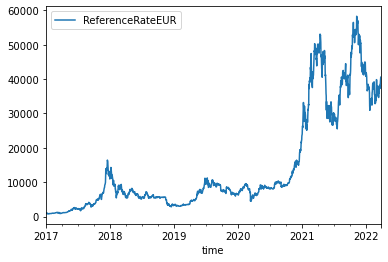

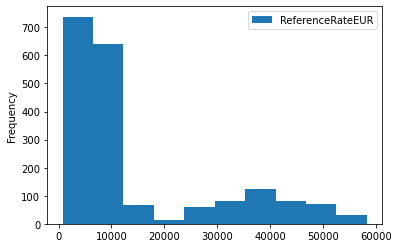

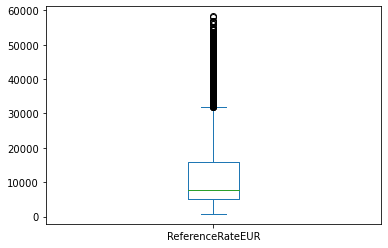

In [24]:
df2017[['ReferenceRateEUR']].plot()
df2017[['ReferenceRateEUR']].plot.hist()
df2017[['ReferenceRateEUR']].plot.box()
df2017[['ReferenceRateEUR']].describe()

Prix du BTC en EUR

VARIABLE RETENUE

# ReferenceRateUSD
### Reference Rate, USD

Le prix d'un actif coté en USD en utilisant un cadre pour sélectionner des marchés constitutifs de haute qualité et une méthodologie qui résiste à la manipulation.

,ReferenceRateUSD
count,1912.000000
mean,16610.448453
std,17435.523451
min,788.314656
25%,5815.743249
50%,8859.538044
75%,19015.177051
max,67541.755508


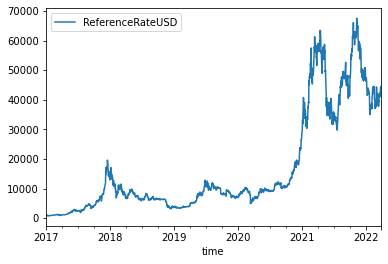

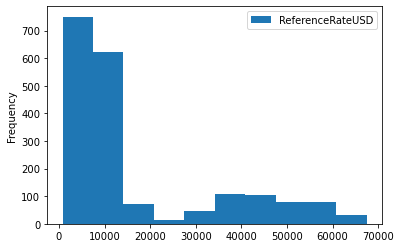

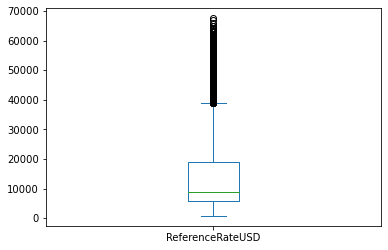

In [26]:
df2017[['ReferenceRateUSD']].plot()
df2017[['ReferenceRateUSD']].plot.hist()
df2017[['ReferenceRateUSD']].plot.box()
df2017[['ReferenceRateUSD']].describe()

Variable identique a ReferenceRate

VARIABLE RETENUE

# RevAllTimeUSD
### Miner revenue, all time, USD

La somme de la valeur en USD de tous les revenus des mineurs (frais plus unités natives nouvellement émises) pour tous les temps.

Le revenu cumulé des mineurs pour un actif, également appelé thermocap, peut être interprété comme une estimation des entrées fiduciaires dans un actif. L'hypothèse derrière cela est que les mineurs ont des dépenses fiat mais des revenus en crypto. Pour couvrir leurs dépenses (matériel minier, électricité, salaires, etc.), ils doivent vendre une partie ou la majeure partie de leurs revenus en crypto pour du fiat. Compte tenu de cela, nous savons que l'autre partie de cette transaction doit vendre fiat pour crypto et est donc un nouvel afflux dans l'actif. Bien que cela s'applique aux actifs importants, les mineurs d'actifs plus petits peuvent vendre leur crypto minée pour BTC/ETH, puis la revendre pour USD. Il s'agit d'une heuristique naïve et suppose que les mineurs n'exploitent pas de manière spéculative, thésaurisant leurs pièces sans les revendre.

,RevAllTimeUSD
count,1.911000e+03
mean,1.567675e+10
std,1.047565e+10
min,2.080826e+09
25%,7.909751e+09
50%,1.385698e+10
75%,2.048499e+10
max,4.110520e+10


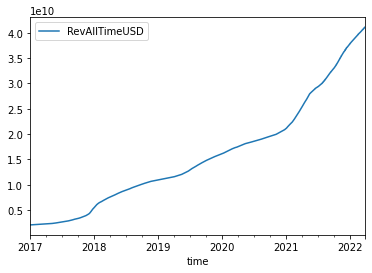

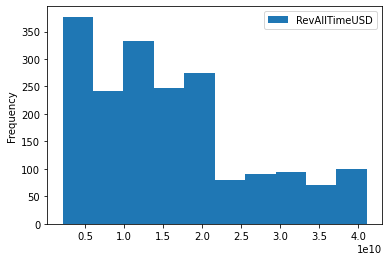

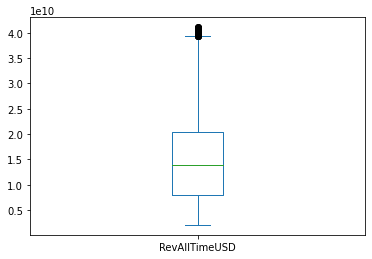

In [27]:
df2017[['RevAllTimeUSD']].plot()
df2017[['RevAllTimeUSD']].plot.hist()
df2017[['RevAllTimeUSD']].plot.box()
df2017[['RevAllTimeUSD']].describe()

Valeur qui va ne faire qu'augmenter dans le temps, rien d'intéressant

VARIABLE NON RETENUE

# RevHashNtv
### Revenue, per hash unit, native units

La récompense moyenne du mineur par unité de hachage estimée effectuée au cours de la période, en unités natives. L'unité de mesure de la puissance de hachage dépend du protocole.

,RevHashNtv
count,1.911000e+03
mean,1.198188e-09
std,2.075197e-09
min,5.200000e-11
25%,9.000000e-11
50%,2.980000e-10
75%,7.680000e-10
max,1.007300e-08


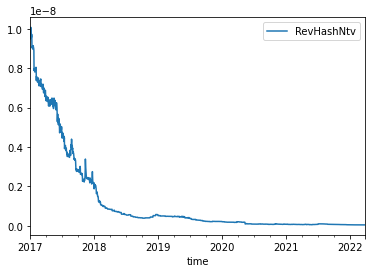

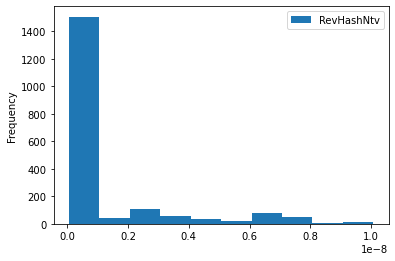

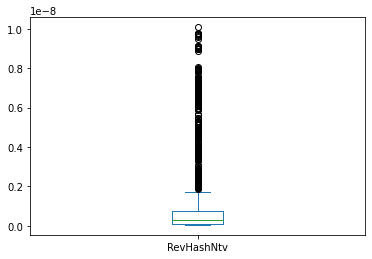

In [28]:
df2017[['RevHashNtv']].plot()
df2017[['RevHashNtv']].plot.hist()
df2017[['RevHashNtv']].plot.box()
df2017[['RevHashNtv']].describe()

Variable qui semble avoir aucun lien avec le cours du BTC

VARIABLE NON RETENUE

# RevHashRateNtv
### Revenue, daily, per hash unit per second, native units

Récompense quotidienne moyenne du mineur par unité de hachage estimée par seconde effectuée au cours de la période, en unités natives. L'unité de mesure de la puissance de hachage dépend du protocole.

,RevHashRateNtv
count,1911.000000
mean,0.000104
std,0.000179
min,0.000005
25%,0.000008
50%,0.000026
75%,0.000066
max,0.000870


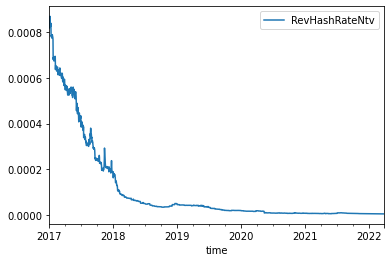

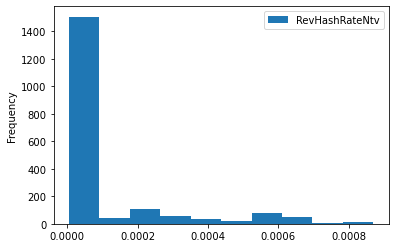

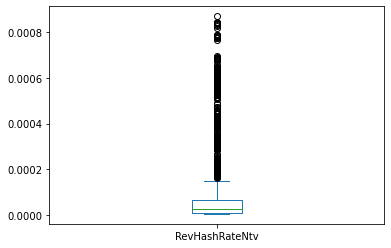

In [29]:
df2017[['RevHashRateNtv']].plot()
df2017[['RevHashRateNtv']].plot.hist()
df2017[['RevHashRateNtv']].plot.box()
df2017[['RevHashRateNtv']].describe()

Variable qui semble avoir aucun lien avec le cours du BTC

VARIABLE NON RETENUE

# RevHashRateUSD
### Revenue, daily, per hash unit per second, USD

La valeur en USD de la récompense quotidienne moyenne du mineur par unité de hachage estimée par seconde effectuée au cours de la période, également appelée prix de hachage. L'unité de mesure de la puissance de hachage dépend du protocole.

,RevHashRateUSD
count,1911.000000
mean,0.459656
std,0.525473
min,0.070624
25%,0.163089
50%,0.266450
75%,0.539775
max,3.877038


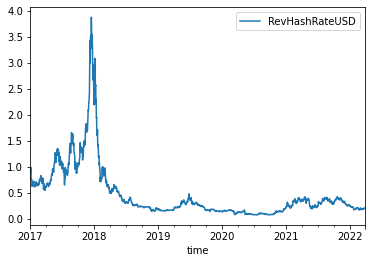

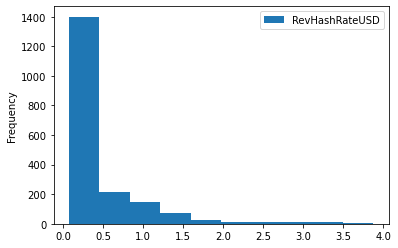

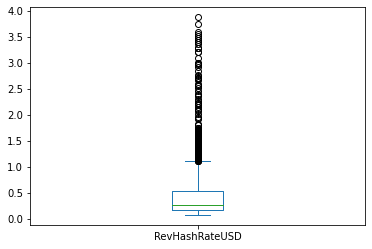

In [30]:
df2017[['RevHashRateUSD']].plot()
df2017[['RevHashRateUSD']].plot.hist()
df2017[['RevHashRateUSD']].plot.box()
df2017[['RevHashRateUSD']].describe()

Nous pouvons voir que lors des bullrun du BTC, les revenues en USD des mineurs ont augmenté mais cela est dû au l'augmentation de la valeur du BTC.

VARIABLE NON RETENUE

# RevHashUSD
### Revenue, per hash unit, USD

La récompense moyenne du mineur par unité de hachage estimée effectuée au cours de la période, en USD. L'unité de mesure de la puissance de hachage dépend du protocole.

,RevHashUSD
count,1.911000e+03
mean,5.320096e-06
std,6.081866e-06
min,8.174030e-07
25%,1.887601e-06
50%,3.083913e-06
75%,6.247398e-06
max,4.487312e-05


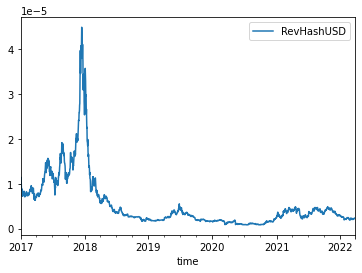

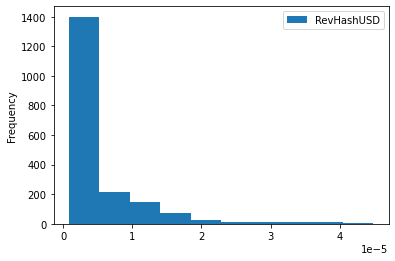

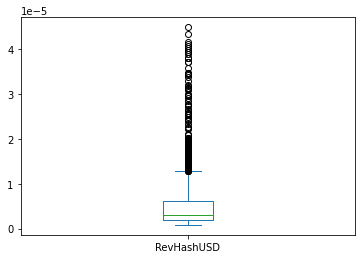

In [31]:
df2017[['RevHashUSD']].plot()
df2017[['RevHashUSD']].plot.hist()
df2017[['RevHashUSD']].plot.box()
df2017[['RevHashUSD']].describe()

Pareil que la variable précédente

VARIABLE NON RETENUE

# RevNtv
### Miner revenue, native units

La somme des unités natives de revenus des mineurs (frais plus unités natives nouvellement émises) cet intervalle.
Les revenus miniers n'incluent pas les récompenses des fondateurs / l'émission de fonds communautaires.

,RevNtv
count,1911.000000
mean,1629.524670
std,543.556901
min,389.228305
25%,1025.265030
50%,1792.519230
75%,2034.955594
max,3433.248916


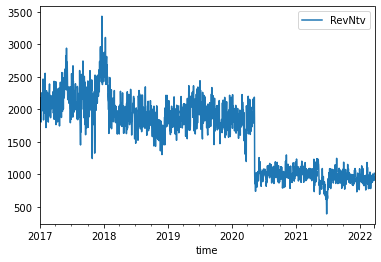

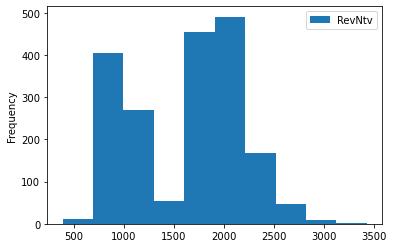

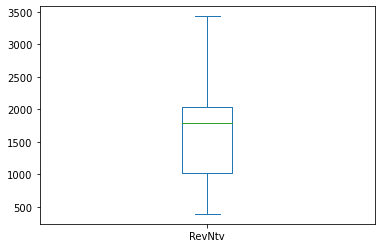

In [33]:
df2017[['RevNtv']].plot()
df2017[['RevNtv']].plot.hist()
df2017[['RevNtv']].plot.box()
df2017[['RevNtv']].describe()

Variable comme Iss 

VARIABLE NON RETENUE

# RevUSD
### Miner revenue, USD

La somme de la valeur en USD de tous les revenus des mineurs (frais plus unités natives nouvellement émises) pour cet intervalle.

,RevUSD
count,1.911000e+03
mean,2.044560e+07
std,1.592716e+07
min,1.596334e+06
25%,9.446203e+06
50%,1.497815e+07
75%,2.871205e+07
max,7.783566e+07


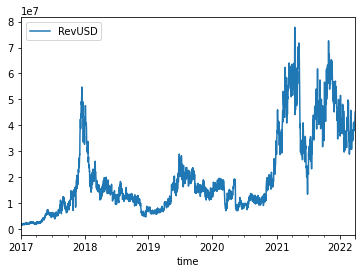

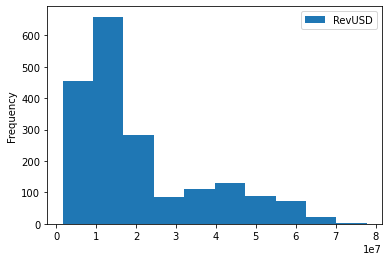

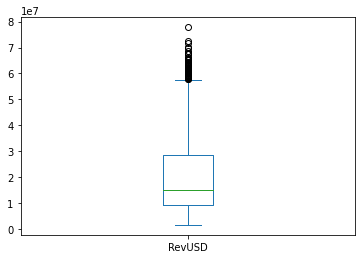

In [34]:
df2017[['RevUSD']].plot()
df2017[['RevUSD']].plot.hist()
df2017[['RevUSD']].plot.box()
df2017[['RevUSD']].describe()

VARIABLE NON RETENUE

# SER
### Supply equality ratio

Le ratio de l'offre détenue par les adresses avec moins d'un dix-millionième de l'offre actuelle détenue par le 1 % des adresses les plus riches.

,SER
count,1911.000000
mean,0.072752
std,0.013581
min,0.040497
25%,0.067006
50%,0.077764
75%,0.081814
max,0.091363


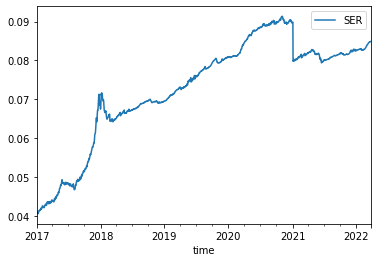

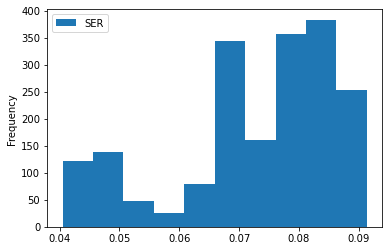

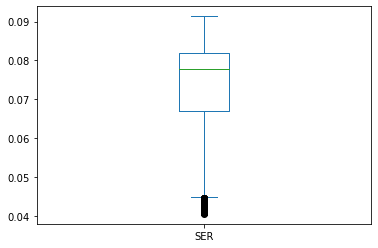

In [35]:
df2017[['SER']].plot()
df2017[['SER']].plot.hist()
df2017[['SER']].plot.box()
df2017[['SER']].describe()

Aucune interprétation ?

VARIABLE NON RETENUE

# SplyAct10yr
### Supply, active, 10yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 10 dernières années jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.


,SplyAct10yr
count,1.911000e+03
mean,1.583082e+07
std,7.594166e+05
min,1.422048e+07
25%,1.520551e+07
50%,1.609659e+07
75%,1.650608e+07
max,1.666584e+07


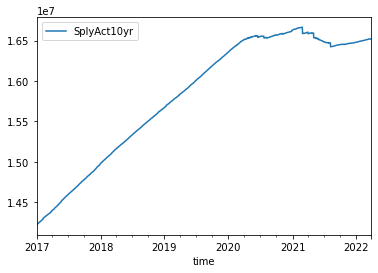

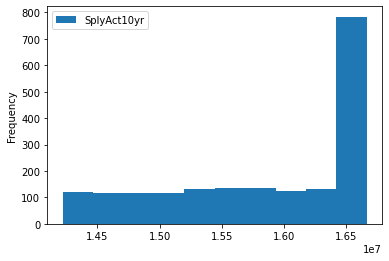

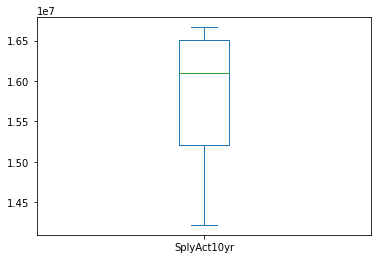

In [36]:
df2017[['SplyAct10yr']].plot()
df2017[['SplyAct10yr']].plot.hist()
df2017[['SplyAct10yr']].plot.box()
df2017[['SplyAct10yr']].describe()

Avec une échelle de 10 ans, nous ne pouvons rien voir

VARIABLE NON RETENUE

# SplyAct180d
### Supply, active, 180d

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 180 derniers jours jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct180d
count,1.911000e+03
mean,5.710483e+06
std,1.034672e+06
min,4.294275e+06
25%,4.953825e+06
50%,5.408261e+06
75%,6.452510e+06
max,8.416298e+06


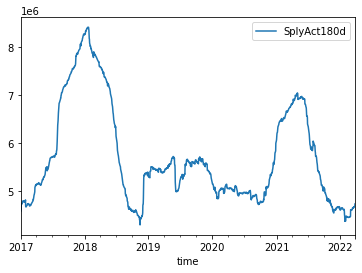

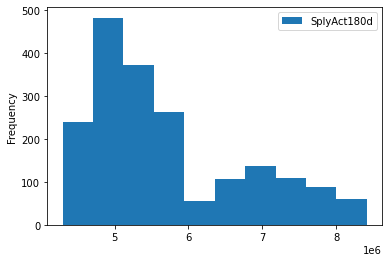

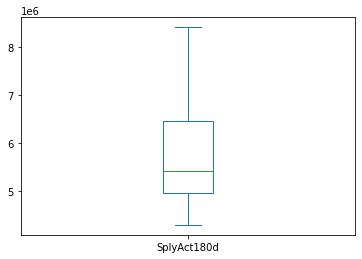

In [39]:
df2017[['SplyAct180d']].plot()
df2017[['SplyAct180d']].plot.hist()
df2017[['SplyAct180d']].plot.box()
df2017[['SplyAct180d']].describe()

Variable qui monte aussi lors des forte et longues montées du BTC

VARIABLE RETENUE

# SplyAct1d
### Supply, active, 1d

Somme des unités natives uniques qui ont effectué au moins une transaction au cours de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct1d
count,1.911000e+03
mean,3.717383e+05
std,1.252917e+05
min,1.397144e+05
25%,2.876604e+05
50%,3.517155e+05
75%,4.387517e+05
max,1.029414e+06


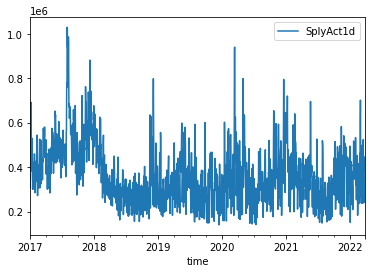

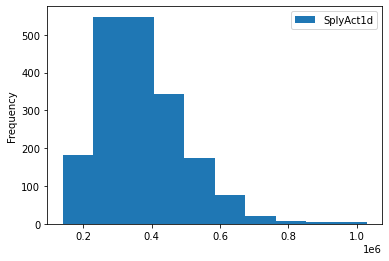

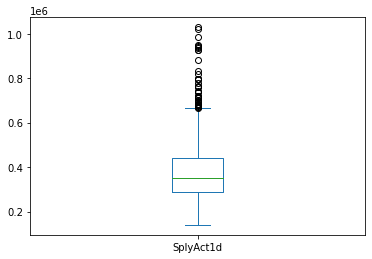

In [40]:
df2017[['SplyAct1d']].plot()
df2017[['SplyAct1d']].plot.hist()
df2017[['SplyAct1d']].plot.box()
df2017[['SplyAct1d']].describe()

Echelle de temps trop courte, a majorité des valeurs se trouve entre 0,3 et 0,5

VARIABLE NON RETENUE

# SplyAct1yr
### Supply, active, 1yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours de l'année précédente jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct1yr
count,1.911000e+03
mean,8.093504e+06
std,9.298169e+05
min,6.665368e+06
25%,7.428738e+06
50%,8.041381e+06
75%,8.617052e+06
max,1.007640e+07


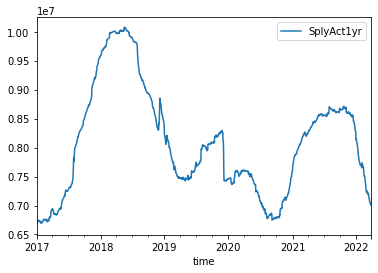

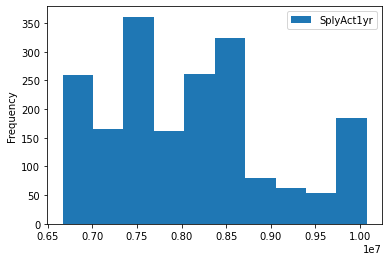

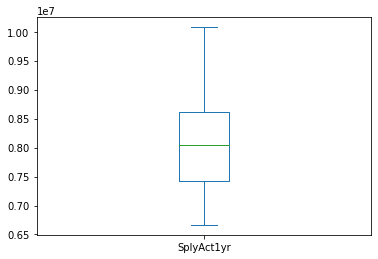

In [41]:
df2017[['SplyAct1yr']].plot()
df2017[['SplyAct1yr']].plot.hist()
df2017[['SplyAct1yr']].plot.box()
df2017[['SplyAct1yr']].describe()

Variable qui monte aussi lors des forte et longues montées du BTC

VARIABLE RETENUE

# SplyAct2yr
### Supply, active, 2yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 2 dernières années jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct2yr
count,1.911000e+03
mean,1.060826e+07
std,8.979050e+05
min,8.489751e+06
25%,1.024497e+07
50%,1.044080e+07
75%,1.131955e+07
max,1.209207e+07


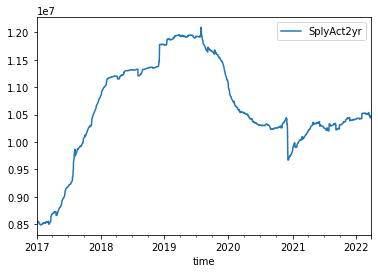

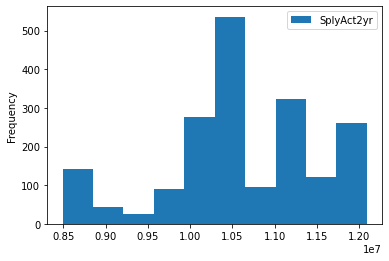

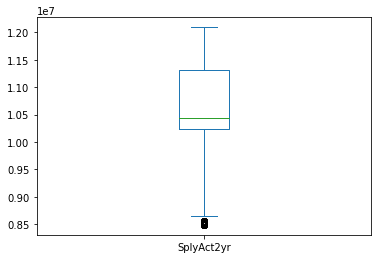

In [42]:
df2017[['SplyAct2yr']].plot()
df2017[['SplyAct2yr']].plot.hist()
df2017[['SplyAct2yr']].plot.box()
df2017[['SplyAct2yr']].describe()

On voit bien la montée de 2017-2018 mais pas 2021

VARIABLE NON RETENUE

# SplyAct30d
### Supply, active, 30d

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 30 derniers jours jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct30d
count,1.911000e+03
mean,2.098456e+06
std,5.626742e+05
min,1.258747e+06
25%,1.682192e+06
50%,1.940069e+06
75%,2.389250e+06
max,4.197113e+06


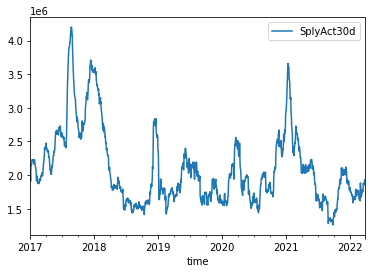

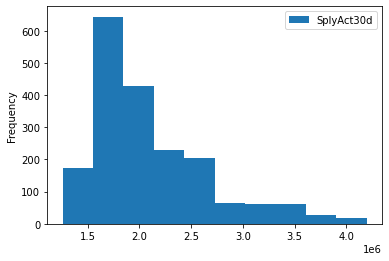

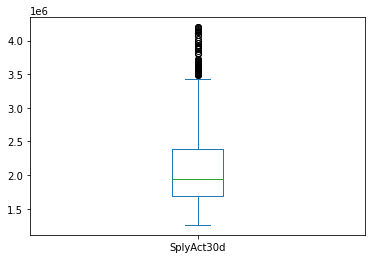

In [43]:
df2017[['SplyAct30d']].plot()
df2017[['SplyAct30d']].plot.hist()
df2017[['SplyAct30d']].plot.box()
df2017[['SplyAct30d']].describe()

Ne sait pas comment interpréter ??

VARIABLE RETENUE ??

# SplyAct3yr
### Supply, active, 3yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 3 dernières annéees jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct3yr
count,1.911000e+03
mean,1.216059e+07
std,8.487803e+05
min,1.022519e+07
25%,1.178343e+07
50%,1.217148e+07
75%,1.281610e+07
max,1.330023e+07


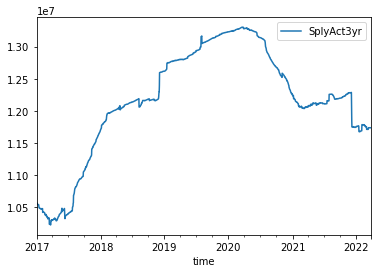

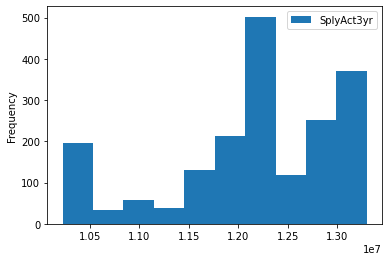

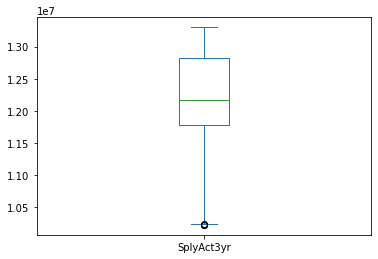

In [44]:
df2017[['SplyAct3yr']].plot()
df2017[['SplyAct3yr']].plot.hist()
df2017[['SplyAct3yr']].plot.box()
df2017[['SplyAct3yr']].describe()

Echelle de temps trop grande pour pouvoir faire de lien avec le cours du BTC

VARIABLE NON RETENUE

# SplyAct4yr
### Supply, active, 4yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 4 dernières annéees jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct4yr
count,1.911000e+03
mean,1.336966e+07
std,5.075548e+05
min,1.247779e+07
25%,1.283890e+07
50%,1.346900e+07
75%,1.385387e+07
max,1.404252e+07


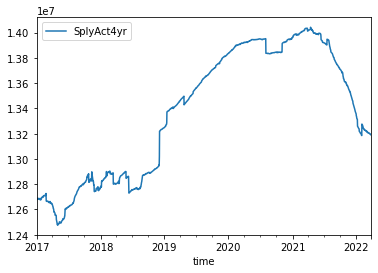

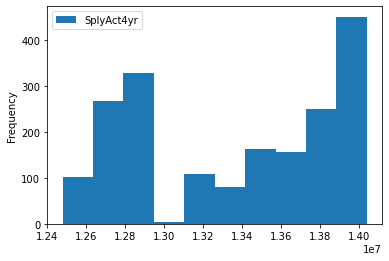

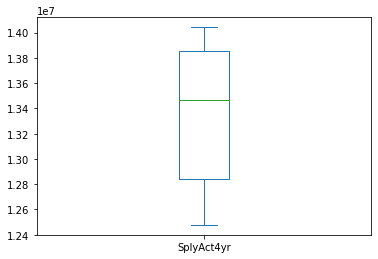

In [45]:
df2017[['SplyAct4yr']].plot()
df2017[['SplyAct4yr']].plot.hist()
df2017[['SplyAct4yr']].plot.box()
df2017[['SplyAct4yr']].describe()

Echelle de temps trop grande pour pouvoir faire de lien avec le cours du BTC

VARIABLE NON RETENUE

# SplyAct5yr
### Supply, active, 5yr

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 5 dernières annéees jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct5yr
count,1.911000e+03
mean,1.411130e+07
std,3.634191e+05
min,1.323748e+07
25%,1.394917e+07
50%,1.406243e+07
75%,1.447556e+07
max,1.462163e+07


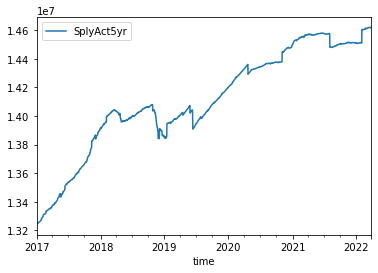

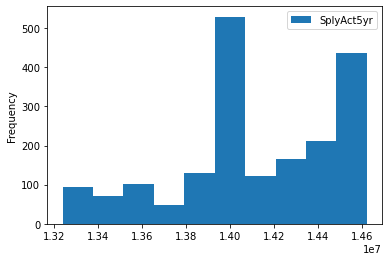

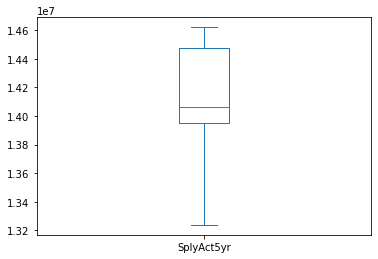

In [46]:
df2017[['SplyAct5yr']].plot()
df2017[['SplyAct5yr']].plot.hist()
df2017[['SplyAct5yr']].plot.box()
df2017[['SplyAct5yr']].describe()

Echelle de temps trop grande pour pouvoir faire de lien avec le cours du BTC

VARIABLE NON RETENUE

# SplyAct7d
### Supply, active, 7d

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 7 derniers jours jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct7d
count,1.911000e+03
mean,9.045400e+05
std,2.646305e+05
min,4.984217e+05
25%,7.143797e+05
50%,8.422752e+05
75%,1.029010e+06
max,2.381702e+06


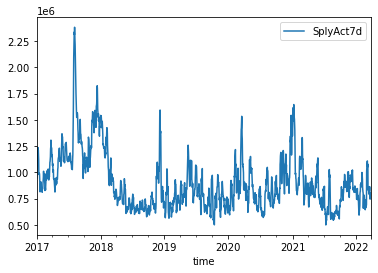

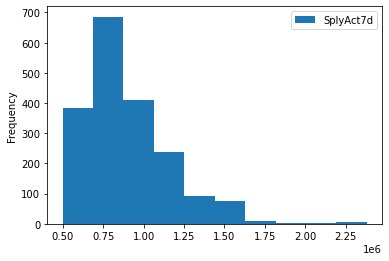

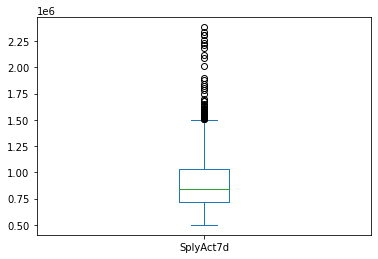

In [47]:
df2017[['SplyAct7d']].plot()
df2017[['SplyAct7d']].plot.hist()
df2017[['SplyAct7d']].plot.box()
df2017[['SplyAct7d']].describe()

La majorité des valeurs se trouvent entre 0,65 et 0,85. Aucune interprétation

VARIABLE NON RETENUE

# SplyAct90d
### Supply, active, 90d

La somme des unités natives uniques qui ont effectué au moins une transaction au cours des 90 derniers jours jusqu'à la fin de cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyAct90d
count,1.911000e+03
mean,3.944108e+06
std,8.921772e+05
min,2.757124e+06
25%,3.284038e+06
50%,3.699732e+06
75%,4.287635e+06
max,6.144258e+06


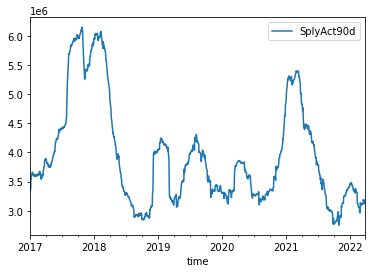

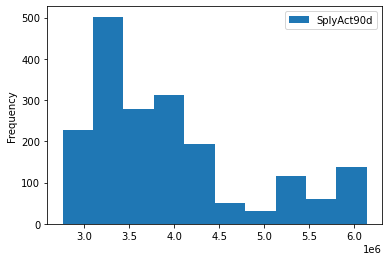

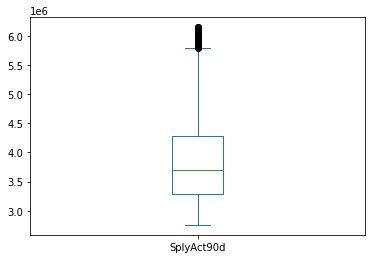

In [48]:
df2017[['SplyAct90d']].plot()
df2017[['SplyAct90d']].plot.hist()
df2017[['SplyAct90d']].plot.box()
df2017[['SplyAct90d']].describe()

On voit que la courbe monte aussi lors des longues montées du BTC.

VARIABLE RETENUE

# SplyActEver
### Supply, active, ever

La somme des unités natives uniques détenues par les comptes ayant effectué au moins une transaction jusqu'à cet intervalle. Les unités natives qui ont effectué plus d'une transaction ne sont comptées qu'une seule fois.

,SplyActEver
count,1.911000e+03
mean,1.597012e+07
std,9.014468e+05
min,1.422048e+07
25%,1.520551e+07
50%,1.610861e+07
75%,1.678752e+07
max,1.721720e+07


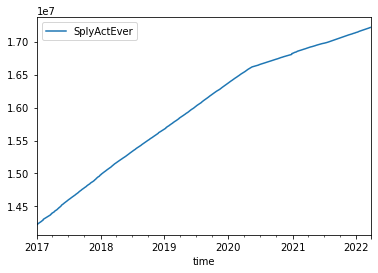

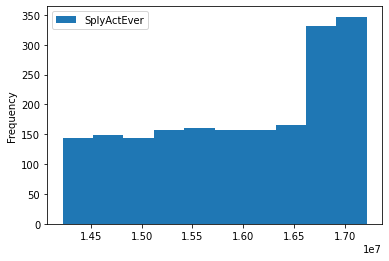

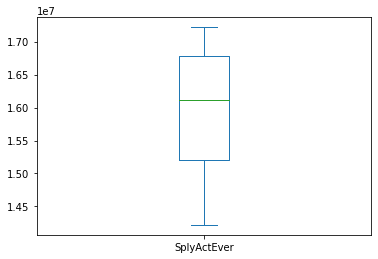

In [49]:
df2017[['SplyActEver']].plot()
df2017[['SplyActEver']].plot.hist()
df2017[['SplyActEver']].plot.box()
df2017[['SplyActEver']].describe()

Courbe qui ressembe au SplyAct10yr. Aucune interprétation

VARIABLE NON RETENUE

# SplyActPct1yr
### Supply, active, percent, 1yr

Le pourcentage de l'approvisionnement actuel qui a été actif au cours de l'année précédente jusqu'à ce jour.

Calculé comme SplyAct1yr / SplyCur

,SplyActPct1yr
count,1911.000000
mean,45.732839
std,6.116693
min,36.517040
25%,41.606543
50%,44.486835
75%,48.740717
max,59.135651


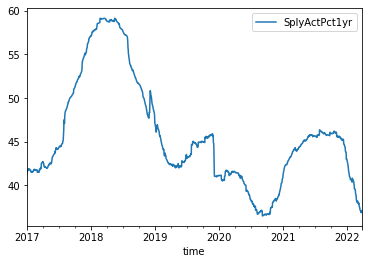

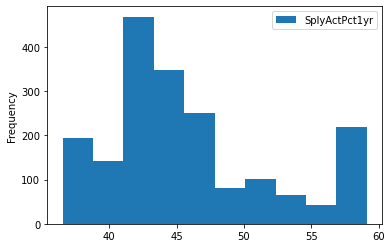

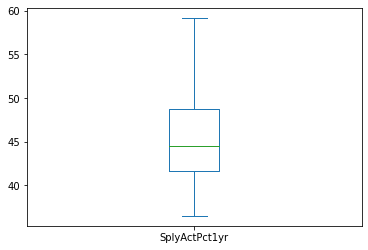

In [50]:
df2017[['SplyActPct1yr']].plot()
df2017[['SplyActPct1yr']].plot.hist()
df2017[['SplyActPct1yr']].plot.box()
df2017[['SplyActPct1yr']].describe()

Les montées de cette courbe se passe en même temps que les longues montées du BTC.

VARIABLE RETENUE

# SplyAdrBal1in100K
### Supply, in addresses with balance, greater than 1in100K

La somme de toutes les unités natives détenues dans des adresses dont le solde était d'au moins un cent millième (100/1000, 1/10) de l'offre actuelle d'unités natives à la fin de cet intervalle. Seules les unités natives sont prises en compte (par exemple, une adresse avec moins de X ETH mais avec plus de X dans les jetons ERC-20 ne serait pas prise en compte)

,SplyAdrBal1in100K
count,1.911000e+03
mean,1.014377e+07
std,6.193414e+05
min,9.149696e+06
25%,9.510102e+06
50%,1.016900e+07
75%,1.054350e+07
max,1.119274e+07


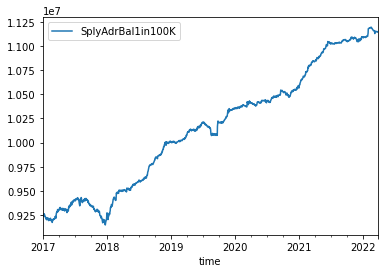

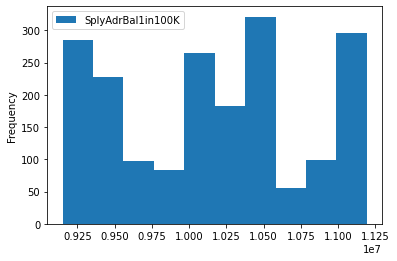

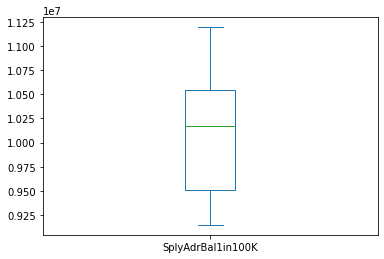

In [51]:
df2017[['SplyAdrBal1in100K']].plot()
df2017[['SplyAdrBal1in100K']].plot.hist()
df2017[['SplyAdrBal1in100K']].plot.box()
df2017[['SplyAdrBal1in100K']].describe()

Variable qui semble ne pas avoir de lien avec le cours du BTC

VARIABLE NON RETENUE